# Capstone Project 1: MuscleHub AB Test

You’ve been hired to help MuscleHub, a fancy gym, run an A/B test!

Currently, when a visitor to MuscleHub is considering buying a membership, he or she follows the following steps:

Take a fitness test with a personal trainer
1. Fill out an application for the gym
2. Send in their payment for their first month’s membership
Janet, the manager of MuscleHub, thinks that the fitness test intimidates some prospective members, so she has set up an A/B test.

Visitors will randomly be assigned to one of two groups:

- Group A will still be asked to take a fitness test with a personal trainer
- Group B will skip the fitness test and proceed directly to the application

Janet’s hypothesis is that visitors assigned to Group B will be more likely to eventually purchase a membership to MuscleHub.



<i>Import Libraries<i>

In [1]:
# SQL library exclusive to this project
from SQL_lib import sql_query

# Data analysis and manipulation library
import pandas as pd 

# Data Visualization library
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

# Statistical functions library
from scipy.stats import chi2_contingency

## Step 1: Get started with SQL

Like most businesses, Janet keeps her data in a SQL database.  Normally, you'd download the data from her database to a csv file, and then load it into a Jupyter Notebook using Pandas.

For this project, you'll have to access SQL in a slightly different way.  You'll be using a special Codecademy library that lets you type SQL queries directly into this Jupyter notebook.  You'll have pass each SQL query as an argument to a function called `sql_query`.  Each query will return a Pandas DataFrame.

<i>See SQL_lib.py</i>

## Step 2: Get your dataset

Let's get started!

Janet of MuscleHub has a SQLite database, which contains several tables that will be helpful to you in this investigation:
- `visits` contains information about potential gym customers who have visited MuscleHub
- `fitness_tests` contains information about potential customers in "Group A", who were given a fitness test
- `applications` contains information about any potential customers (both "Group A" and "Group B") who filled out an application.  Not everyone in `visits` will have filled out an application.
- `purchases` contains information about customers who purchased a membership to MuscleHub.

Use the space below to examine each table.

In [2]:
# Examine visits here
df_exa = sql_query('''
SELECT *
FROM visits
LIMIT 5
''')
# Drops the extra index column created when using sql_query()
df_exa.drop(['index'], axis=1)

,first_name,last_name,email,gender,visit_date
0,Karen,Manning,Karen.Manning@gmail.com,female,5-1-17
1,Annette,Boone,AB9982@gmail.com,female,5-1-17
2,Salvador,Merritt,SalvadorMerritt12@outlook.com,male,5-1-17
3,Martha,Maxwell,Martha.Maxwell@gmail.com,female,5-1-17
4,Andre,Mayer,AndreMayer90@gmail.com,male,5-1-17


In [3]:
# Examine fitness_tests here
df_exa = sql_query('''
SELECT *
FROM fitness_tests
LIMIT 5
''')
# Drops the extra index column created when using sql_query()
df_exa.drop(['index'], axis=1)

,first_name,last_name,email,gender,fitness_test_date
0,Kim,Walter,KimWalter58@gmail.com,female,2017-07-03
1,Tom,Webster,TW3857@gmail.com,male,2017-07-02
2,Marcus,Bauer,Marcus.Bauer@gmail.com,male,2017-07-01
3,Roberta,Best,RB6305@hotmail.com,female,2017-07-02
4,Carrie,Francis,CF1896@hotmail.com,female,2017-07-05


In [4]:
# Examine applications here
df_exa = sql_query('''
SELECT *
FROM applications
LIMIT 5
''')
# Drops the extra index column created when using sql_query()
df_exa.drop(['index'], axis=1)

,first_name,last_name,email,gender,application_date
0,Roy,Abbott,RoyAbbott32@gmail.com,male,2017-08-12
1,Agnes,Acevedo,AgnesAcevedo1@gmail.com,female,2017-09-29
2,Roberta,Acevedo,RA8063@gmail.com,female,2017-09-15
3,Darren,Acosta,DAcosta1996@hotmail.com,male,2017-07-26
4,Vernon,Acosta,VAcosta1975@gmail.com,male,2017-07-14


In [5]:
# Examine purchases here
df_exa = sql_query('''
SELECT *
FROM purchases
LIMIT 5
''')
# Drops the extra index column created when using sql_query()
df_exa.drop(['index'], axis=1)

,first_name,last_name,email,gender,purchase_date
0,Roy,Abbott,RoyAbbott32@gmail.com,male,2017-08-18
1,Roberta,Acevedo,RA8063@gmail.com,female,2017-09-16
2,Vernon,Acosta,VAcosta1975@gmail.com,male,2017-07-20
3,Darren,Acosta,DAcosta1996@hotmail.com,male,2017-07-27
4,Dawn,Adkins,Dawn.Adkins@gmail.com,female,2017-08-24


We'd like to download a giant DataFrame containing all of this data.  You'll need to write a query that does the following things:

1. Not all visits in  `visits` occurred during the A/B test.  You'll only want to pull data where `visit_date` is on or after `7-1-17`.

2. You'll want to perform a series of `LEFT JOIN` commands to combine the four tables that we care about.  You'll need to perform the joins on `first_name`, `last_name`, and `email`.  Pull the following columns:


- `visits.first_name`
- `visits.last_name`
- `visits.gender`
- `visits.email`
- `visits.visit_date`
- `fitness_tests.fitness_test_date`
- `applications.application_date`
- `purchases.purchase_date`

Save the result of this query to a variable called `df`.

Hint: your result should have 5004 rows.  Does it?

In [6]:
df = sql_query('''
SELECT visits.first_name,
       visits.last_name,
       visits.visit_date,
       fitness_tests.fitness_test_date,
       applications.application_date,
       purchases.purchase_date
FROM visits
LEFT JOIN fitness_tests
    ON fitness_tests.first_name = visits.first_name
    AND fitness_tests.last_name = visits.last_name
    AND fitness_tests.email = visits.email
LEFT JOIN applications
    ON applications.first_name = visits.first_name
    AND applications.last_name = visits.last_name
    AND applications.email = visits.email
LEFT JOIN purchases
    ON purchases.first_name = visits.first_name
    AND purchases.last_name = visits.last_name
    AND purchases.email = visits.email
WHERE visits.visit_date >= '7-1-17'
''')

df

,first_name,last_name,visit_date,fitness_test_date,application_date,purchase_date
0,Kim,Walter,7-1-17,2017-07-03,None,None
1,Tom,Webster,7-1-17,2017-07-02,None,None
2,Edward,Bowen,7-1-17,None,2017-07-04,2017-07-04
3,Marcus,Bauer,7-1-17,2017-07-01,2017-07-03,2017-07-05
4,Roberta,Best,7-1-17,2017-07-02,None,None
...,...,...,...,...,...,...
4999,Rachel,Hensley,9-9-17,None,None,None
5000,Leon,Harmon,9-9-17,2017-09-15,None,None
5001,Andy,Pratt,9-9-17,2017-09-15,None,None
5002,Ruben,Nielsen,9-9-17,None,2017-09-13,None


## Step 3: Investigate the A and B groups

We're going to add some columns to `df` to help us with our analysis.

Start by adding a column called `ab_test_group`.  It should be `A` if `fitness_test_date` is not `None`, and `B` if `fitness_test_date` is `None`.

In [7]:
df['ab_test_group'] = df.fitness_test_date.apply(lambda x : 'A' if pd.notnull(x) else 'B')
df

,first_name,last_name,visit_date,fitness_test_date,application_date,purchase_date,ab_test_group
0,Kim,Walter,7-1-17,2017-07-03,None,None,A
1,Tom,Webster,7-1-17,2017-07-02,None,None,A
2,Edward,Bowen,7-1-17,None,2017-07-04,2017-07-04,B
3,Marcus,Bauer,7-1-17,2017-07-01,2017-07-03,2017-07-05,A
4,Roberta,Best,7-1-17,2017-07-02,None,None,A
...,...,...,...,...,...,...,...
4999,Rachel,Hensley,9-9-17,None,None,None,B
5000,Leon,Harmon,9-9-17,2017-09-15,None,None,A
5001,Andy,Pratt,9-9-17,2017-09-15,None,None,A
5002,Ruben,Nielsen,9-9-17,None,2017-09-13,None,B


Let's do a quick sanity check that Janet split her visitors such that about half are in A and half are in B.

Start by using `groupby` to count how many users are in each `ab_test_group`.  Save the results to `ab_counts`.

In [8]:
ab_counts = df.groupby('ab_test_group').first_name.count().reset_index()
ab_counts

,ab_test_group,first_name
0,A,2504
1,B,2500


We'll want to include this information in our presentation.  Let's create a pie cart using `plt.pie`.
- Save your figure as `ab_test_pie_chart.png`

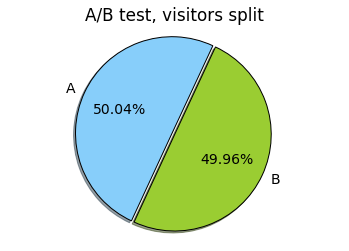

In [9]:
plt.rcParams['font.size'] = 14

plt.pie(ab_counts.first_name.values, 
        labels=['A', 'B'], 
        colors=['lightskyblue', 'yellowgreen'],
        wedgeprops={'edgecolor':'0','linewidth': 1},
        autopct='%1.2f%%',
        explode=(0, 0.03),
        shadow=True, 
        startangle=65)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('A/B test, visitors split')

plt.savefig('graph/ab_test_pie_chart.png')
plt.show()

## Step 4: Who picks up an application?

Recall that the sign-up process for MuscleHub has several steps:
1. Take a fitness test with a personal trainer (only Group A)
2. Fill out an application for the gym
3. Send in their payment for their first month's membership

Let's examine how many people make it to Step 2, filling out an application.

Start by creating a new column in `df` called `is_application` which is `Application` if `application_date` is not `None` and `No Application`, otherwise.

In [10]:
df['is_application'] = df.application_date.apply(lambda x : 'Application' if pd.notnull(x) else 'No Application')
df

,first_name,last_name,visit_date,fitness_test_date,application_date,purchase_date,ab_test_group,is_application
0,Kim,Walter,7-1-17,2017-07-03,None,None,A,No Application
1,Tom,Webster,7-1-17,2017-07-02,None,None,A,No Application
2,Edward,Bowen,7-1-17,None,2017-07-04,2017-07-04,B,Application
3,Marcus,Bauer,7-1-17,2017-07-01,2017-07-03,2017-07-05,A,Application
4,Roberta,Best,7-1-17,2017-07-02,None,None,A,No Application
...,...,...,...,...,...,...,...,...
4999,Rachel,Hensley,9-9-17,None,None,None,B,No Application
5000,Leon,Harmon,9-9-17,2017-09-15,None,None,A,No Application
5001,Andy,Pratt,9-9-17,2017-09-15,None,None,A,No Application
5002,Ruben,Nielsen,9-9-17,None,2017-09-13,None,B,Application


Now, count how many people from Group A and Group B either do or don't pick up an application.  You'll want to group by `ab_test_group` and `is_application`.  Save this new DataFrame as `app_counts`

In [11]:
app_counts = df.groupby(['ab_test_group', 'is_application']).first_name.count().reset_index()
app_counts

,ab_test_group,is_application,first_name
0,A,Application,250
1,A,No Application,2254
2,B,Application,325
3,B,No Application,2175


We're going to want to calculate the percent of people in each group who complete an application.  It's going to be much easier to do this if we pivot `app_counts`.

In [12]:
app_pivot = app_counts.pivot(columns='is_application',
                            index='ab_test_group',
                            values='first_name')\
                      .reset_index()

app_pivot

is_application,ab_test_group,Application,No Application
0,A,250,2254
1,B,325,2175


Define a new column called `Total`, which is the sum of `Application` and `No Application`.

In [13]:
app_pivot['Total'] = app_pivot['Application'] + app_pivot['No Application']
app_pivot

is_application,ab_test_group,Application,No Application,Total
0,A,250,2254,2504
1,B,325,2175,2500


Calculate another column called `Percent with Application`, which is equal to `Application` divided by `Total`.

<i>Personal preference:<br>
I called the column representing the percentage of visitors that filled an application</i>`Application Ration`<i>instead of</i> `Percent with Application`.

In [14]:
app_pivot['Application Ratio'] = app_pivot.Application / app_pivot.Total  
app_pivot

is_application,ab_test_group,Application,No Application,Total,Application Ratio
0,A,250,2254,2504,0.09984
1,B,325,2175,2500,0.13000


It looks like more people from Group B turned in an application.  Why might that be?

We need to know if this difference is statistically significant.

Choose a hypothesis tests, import it from `scipy` and perform it.  Be sure to note the p-value.
Is this result significant?

<pre><i>
It is probable, that by doing the fitness test, some of the visitors from test A were intimidated and choose not to 
apply for membership.
A hypothesis test will affirm or negate the assumption that visitors who take the fitness test are less likely to fill 
out an application.

Having two categorical datasets (A/B) with two discrete categories (Application, No application) needing to be compared, I choose to perform a Chi Square Test.
Note: A Binomial Test is performed on one categorical dataset, with no more than two discrete categories.
</i></pre>

In [15]:
contingency = [[app_pivot.Application.loc[0], app_pivot['No Application'].loc[0]], 
               [app_pivot.Application.loc[1], app_pivot['No Application'].loc[1]]]

_, pval, _, _ = chi2_contingency(contingency) 
pval

0.0009647827600722304

<pre><i>
<b>Hypothesis test results analyses:</b>

        Under the MuscleHub A/B test, when applied to the number of visitors that filled a membership application,
        <b>the P-value is under 0.05</b>.
        In other words, under the MuscleHub A/B test, from the visitor stage to the applicant stage, 
        the difference between the tests A and B results are statistically significant.
        
        Visitors who take the fitness test are less likely to fill out an application.
</i></pre>

## Step 4: Who purchases a membership?

Of those who picked up an application, how many purchased a membership?

Let's begin by adding a column to `df` called `is_member` which is `Member` if `purchase_date` is not `None`, and `Not Member` otherwise.

In [16]:
df['is_member'] = df.purchase_date.apply(lambda x : 'Member' if pd.notnull(x) else 'Not Member')
df

,first_name,last_name,visit_date,fitness_test_date,application_date,purchase_date,ab_test_group,is_application,is_member
0,Kim,Walter,7-1-17,2017-07-03,None,None,A,No Application,Not Member
1,Tom,Webster,7-1-17,2017-07-02,None,None,A,No Application,Not Member
2,Edward,Bowen,7-1-17,None,2017-07-04,2017-07-04,B,Application,Member
3,Marcus,Bauer,7-1-17,2017-07-01,2017-07-03,2017-07-05,A,Application,Member
4,Roberta,Best,7-1-17,2017-07-02,None,None,A,No Application,Not Member
...,...,...,...,...,...,...,...,...,...
4999,Rachel,Hensley,9-9-17,None,None,None,B,No Application,Not Member
5000,Leon,Harmon,9-9-17,2017-09-15,None,None,A,No Application,Not Member
5001,Andy,Pratt,9-9-17,2017-09-15,None,None,A,No Application,Not Member
5002,Ruben,Nielsen,9-9-17,None,2017-09-13,None,B,Application,Not Member


Now, let's create a DataFrame called `just_apps` the contains only people who picked up an application.

In [17]:
just_apps = df[df.is_application == 'Application']
just_apps

,first_name,last_name,visit_date,fitness_test_date,application_date,purchase_date,ab_test_group,is_application,is_member
2,Edward,Bowen,7-1-17,None,2017-07-04,2017-07-04,B,Application,Member
3,Marcus,Bauer,7-1-17,2017-07-01,2017-07-03,2017-07-05,A,Application,Member
9,Salvador,Cardenas,7-1-17,2017-07-07,2017-07-06,None,A,Application,Not Member
11,Valerie,Munoz,7-1-17,2017-07-03,2017-07-05,2017-07-06,A,Application,Member
35,Michael,Burks,7-1-17,None,2017-07-07,2017-07-13,B,Application,Member
...,...,...,...,...,...,...,...,...,...
4944,Frances,Kerr,9-8-17,2017-09-12,2017-09-10,2017-09-15,A,Application,Member
4964,Raymond,Cantrell,9-9-17,None,2017-09-13,2017-09-18,B,Application,Member
4972,Roberta,Acevedo,9-9-17,None,2017-09-15,2017-09-16,B,Application,Member
4991,Suzanne,Humphrey,9-9-17,2017-09-09,2017-09-13,2017-09-18,A,Application,Member


### Applicant to Member

Great! Now, let's do a `groupby` to find out how many people in `just_apps` are and aren't members from each group.  We want a DataFrame that looks like this:

|is_member|ab_test_group|Member|Not Member|Total|Percent Purchase|
|-|-|-|-|-|-|
|0|A|?|?|?|?|
|1|B|?|?|?|?|

Save your final DataFrame as `member_pivot`.

In [18]:
ab_member_count = just_apps.groupby(['ab_test_group', 'is_member']).first_name.count().reset_index()
ab_member_count

,ab_test_group,is_member,first_name
0,A,Member,200
1,A,Not Member,50
2,B,Member,250
3,B,Not Member,75


In [19]:
member_pivot = ab_member_count.pivot(columns='is_member',
                                     index='ab_test_group',
                                     values='first_name')\
                              .reset_index()
# Total member of visitors that filled an application
member_pivot['Total'] = member_pivot['Member'] + member_pivot['Not Member']

member_pivot

is_member,ab_test_group,Member,Not Member,Total
0,A,200,50,250
1,B,250,75,325


In [20]:
# Percentage of Application to Membership
member_pivot['Purchase Ratio'] = member_pivot.Member / member_pivot.Total 

member_pivot

is_member,ab_test_group,Member,Not Member,Total,Purchase Ratio
0,A,200,50,250,0.800000
1,B,250,75,325,0.769231


<i>Personal preference:<br>
I called the column representing the percentage of applicants that purchased a membership</i>`Purchase Ration`<i>instead of</i> `Percent with Application`.

It looks like people who took the fitness test were more likely to purchase a membership **if** they picked up an application.  Why might that be?

Just like before, we need to know if this difference is statistically significant.  Choose a hypothesis tests, import it from `scipy` and perform it.  Be sure to note the p-value.
Is this result significant?

<pre><i>
A difference of 3% is not significant enough to conclude that by doing the fitness test an applicant is more likely to 
purchase a membership. 
The difference need to have a value of 5% or greater to be considered statistically significant. 

A hypothesis test will affirm or negate the assumption that is not a difference between group A and group B related to 
applicant to member phase.

Having two categorical datasets with two discrete categories needing to be compared, I choose to use a Chi Square Test.
Note: A Binomial Test is performed on one categorical dataset, with no more than two discrete categories.
</i></pre>

In [21]:
contingency = [[member_pivot.Member.loc[0], member_pivot['Not Member'].loc[0]], 
               [member_pivot.Member.loc[1], member_pivot['Not Member'].loc[1]]]

_, pval, _, _ = chi2_contingency(contingency) 
pval

0.43258646051083327

<pre><i>
<b>Hypothesis test results analyses:</b>

        Under the MuscleHub A/B test, when applied to the number of applicants who purchased a membership, 
        <b>the P-value is over 0.05</b>.
        In other words, under the MuscleHub A/B test, from the applicant stage to the member stage, 
        the difference between the tests A and B results are not statistically significant.
        
        Applicants who take the fitness test are not more likely to become members than the ones who do not.
</i></pre>

### Visitor to Member

Previously, we looked at what percent of people **who picked up applications** purchased memberships.  What we really care about is what percentage of **all visitors** purchased memberships.  Return to `df` and do a `groupby` to find out how many people in `df` are and aren't members from each group.  Follow the same process that we did in Step 4, including pivoting the data.  You should end up with a DataFrame that looks like this:

|is_member|ab_test_group|Member|Not Member|Total|Percent Purchase|
|-|-|-|-|-|-|
|0|A|?|?|?|?|
|1|B|?|?|?|?|

Save your final DataFrame as `final_member_pivot`.

In [22]:
# Using df to create a visitor to member count 
vistor_to_member_count = df.groupby(['ab_test_group', 'is_member'])\
                           .first_name.count().reset_index()

final_member_pivot = vistor_to_member_count.pivot(columns='is_member',
                                                  index='ab_test_group',
                                                  values='first_name')\
                                           .reset_index()

# Total member of visitors that purchased a membership
final_member_pivot['Total'] = final_member_pivot['Member'] + final_member_pivot['Not Member']

final_member_pivot 

is_member,ab_test_group,Member,Not Member,Total
0,A,200,2304,2504
1,B,250,2250,2500


In [23]:
# Percentage of Application to Membership, for each test
final_member_pivot['Purchase Ratio'] = final_member_pivot.Member / final_member_pivot.Total 

final_member_pivot

is_member,ab_test_group,Member,Not Member,Total,Purchase Ratio
0,A,200,2304,2504,0.079872
1,B,250,2250,2500,0.100000


Previously, when we only considered people who had **already picked up an application**, we saw that there was no significant difference in membership between Group A and Group B.

Now, when we consider all people who **visit MuscleHub**, we see that there might be a significant different in memberships between Group A and Group B.  Perform a significance test and check.

In [24]:
contingency = [[final_member_pivot.Member.loc[0], final_member_pivot['Not Member'].loc[0]], 
               [final_member_pivot.Member.loc[1], final_member_pivot['Not Member'].loc[1]]]

_, pval, _, _ = chi2_contingency(contingency) 
pval

0.014724114645783203

<pre><i>
<b>Hypothesis test results analyses:</b>

        Under the MuscleHub A/B test, when applied to the number of the vistors that purchased a membership, 
        <b>the P-value is under 0.05</b>.
        In other words, under the MuscleHub A/B test, from the visitor stage to the member stage, 
        the difference between the tests A and B results are statistically significant.
        
        Visitors who take the fitness test are less likely to become members than the ones who do not.
</i></pre>

## Step 5: Summarize the acquisition funnel with a chart

We'd like to make a bar chart for Janet that shows the difference between Group A (people who were given the fitness test) and Group B (people who were not given the fitness test) at each state of the process:
- Percent of visitors who apply
- Percent of applicants who purchase a membership
- Percent of visitors who purchase a membership

Create one plot for **each** of the three sets of percentages that you calculated in `app_pivot`, `member_pivot` and `final_member_pivot`.  Each plot should:
- Label the two bars as `Fitness Test` and `No Fitness Test`
- Make sure that the y-axis ticks are expressed as percents (i.e., `5%`)
- Have a title

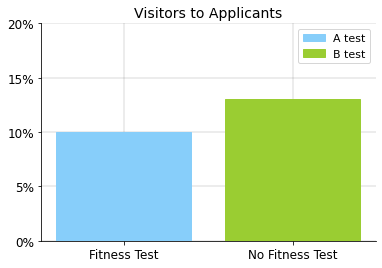

In [25]:
# Percent of visitors who apply
ax = plt.subplot()
bar = plt.bar(range(len(app_pivot)), app_pivot['Application Ratio'].values)

# adds a grid
plt.grid(color='gray', linestyle='-', linewidth=0.3)
# grid lines behind bars
ax.set_axisbelow(True)

# Setting test bar colors
bar[0].set_color('lightskyblue')
bar[1].set_color('yellowgreen')

ax.set_xticks(range(len(app_pivot)))
ax.set_xticklabels(['Fitness Test', 'No Fitness Test'], fontsize=12)

ax.set_yticks([0, 0.05, 0.10, 0.15, 0.20])
ax.set_yticklabels(['0%', '5%', '10%', '15%', '20%'], fontsize=12)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.title('Visitors to Applicants', fontsize=14)

leg_a_test = mpatches.Patch(color='lightskyblue', label='A test')
leg_b_test = mpatches.Patch(color='yellowgreen', label='B test')
plt.legend(handles=[leg_a_test, leg_b_test], fontsize=11)

plt.savefig('graph/percent_visitors_apply.png')
plt.show()

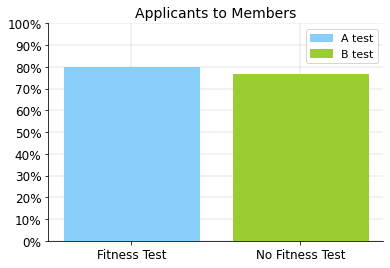

In [26]:
# Percent of Applicants who Purchase
ax = plt.subplot()
bar = plt.bar(range(len(member_pivot)), member_pivot['Purchase Ratio'].values)

# adds a grid
plt.grid(color='gray', linestyle='-', linewidth=0.2)
# grid lines behind bars
ax.set_axisbelow(True)

# Setting test bar colors
bar[0].set_color('lightskyblue')
bar[1].set_color('yellowgreen')

ax.set_xticks(range(len(member_pivot)))
ax.set_xticklabels(['Fitness Test', 'No Fitness Test'], fontsize=12)

ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
ax.set_yticklabels(['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'], fontsize=12)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


plt.title('Applicants to Members', fontsize=14)

leg_a_test = mpatches.Patch(color='lightskyblue', label='A test')
leg_b_test = mpatches.Patch(color='yellowgreen', label='B test')
plt.legend(handles=[leg_a_test, leg_b_test], fontsize=11)


plt.savefig('graph/percent_applicants_purchase.png')
plt.show()

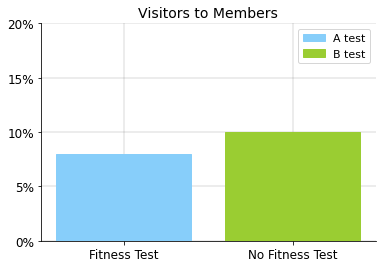

In [27]:
# Percent of visitors who purchase
ax = plt.subplot()
bar = plt.bar(range(len(final_member_pivot)), final_member_pivot['Purchase Ratio'].values)

# adds a grid
plt.grid(color='gray', linestyle='-', linewidth=0.3)
# grid lines behind bars
ax.set_axisbelow(True)

# Setting test bar colors
bar[0].set_color('lightskyblue')
bar[1].set_color('yellowgreen')

ax.set_xticks(range(len(final_member_pivot)))
ax.set_xticklabels(['Fitness Test', 'No Fitness Test'], fontsize=12)

ax.set_yticks([0, 0.05, 0.10, 0.15, 0.20])
ax.set_yticklabels(['0%', '5%', '10%', '15%', '20%'], fontsize=12)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.title('Visitors to Members', fontsize=14)

leg_a_test = mpatches.Patch(color='lightskyblue', label='A test')
leg_b_test = mpatches.Patch(color='yellowgreen', label='B test')
plt.legend(handles=[leg_a_test, leg_b_test], fontsize=11)

plt.savefig('graph/percent_visitors_purchase.png')
plt.show()

<pre><i>
My MuscleHub A/B Test Project Presentation:
<a href="https://www.alex-ricciardi.com/post/musclehub-a-b-test">Analises MuscleHub A/B Test Presentation</a>
</i></pre>